# Ground Motion for Assessment of Losses (GALE)

This ipython notebook supports users in the generation of ground motion fields using data from the USGS ShakeMap system, which can be store in the OpenQuake format and used for loss and damage estimation. These ground motion fields can be generated considering the cross-spatial correlation in the residuals of the ground shaking.

Total number of locations with ground shaking:
114798
The following IMTs were found:
['PGA', 'SA(0.3)', 'SA(1.0)', 'SA(3.0)']
[ 84.          84.10344828  84.20689655  84.31034483  84.4137931
  84.51724138  84.62068966  84.72413793  84.82758621  84.93103448
  85.03448276  85.13793103  85.24137931  85.34482759  85.44827586
  85.55172414  85.65517241  85.75862069  85.86206897  85.96551724
  86.06896552  86.17241379  86.27586207  86.37931034  86.48275862
  86.5862069   86.68965517  86.79310345  86.89655172  87.        ]
Total number of locations after re-distribution
900


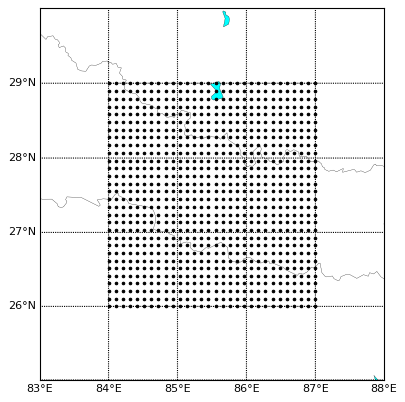

In [5]:
import inputProcessing
import outputProcessing

%matplotlib inline

#Indicate in the following variables the two files from the USGS ShakeMap system (exactly as downloaded)
shakingFile = 'ghorka_shaking.xml'
uncertaintyFile = 'ghorka_uncertainty.xml'

#Extract the ground shaking data from the ShakeMaps
groundShakingData, IMTs = inputProcessing.parse_xml_data_files(shakingFile,uncertaintyFile)

#In order to reduce the computional burden, these data can be reduced using a coarser grid, or the locations of the assets
reducedShakingData = inputProcessing.reduceShakingData(groundShakingData,[84,87,26,29],0.1)
locations = reducedShakingData[:,0:2]

#Plot the locations that will be considered for the ground motion generation
inputProcessing.plotLocations(locations)

#The data can be further reduced based on the locations.
#closestGroundShaking = inputProcessing.extract_closest_ground_shaking(locations,groundShakingData)


In [6]:
import groundShakingCalculation
#Calculate the distance between all of the locations
distanceMatrix = groundShakingCalculation.calculate_distance_matrix(locations)

#Calculate the correlation metix based on the IMTs and distance between all of the locations
spatialCorrMatrices = groundShakingCalculation.calculate_spatial_correlation_matrices(distanceMatrix,IMTs,'spatial')

#Calculate covariance matrix using the correlation matrix
spatialCovMatrices = groundShakingCalculation.calculate_spatial_covariance_matrices(reducedShakingData,spatialCorrMatrices)

#Calculate the cross-correlation matrix considering the 4 IMTs from the ShakeMap system (PGA, Sa at 0.3, 1.0 and 3.0 s)
crossCorrMatrix = groundShakingCalculation.calculate_cross_correlation_matrix(IMTs,'cross')

#Generate the cross correlated ground motion fields
gmfs = groundShakingCalculation.generate_random_fields_ground_motion(IMTs,reducedShakingData,spatialCovMatrices,crossCorrMatrix,True,3,1000)

In [7]:
import outputProcessing

#Specify the file name to save the cross-correlated ground motion fields
file_name = 'Ghorka'

#Specify which IMTs should be saved
IMTs = ['PGA','SA(0.3)']

#Save the cross-correlared ground motion fields in csv and OpenQuake-format for loss estimation (xml)
outputProcessing.save_gmfs_to_csv(file_name,locations,gmfs)
outputProcessing.save_gmfs_to_xml(file_name,IMTs,locations,gmfs)

In [9]:
#Some of the variables can be printed in order to check whether the correlation that was imposed is verified in the outputs
print(spatialCorrMatrices)
print(crossCorrMatrix)
from numpy import corrcoef
corrcoef(gmfs[0],gmfs[3])

[[[  1.00000000e+00   4.28549513e-01   1.83654685e-01 ...,   1.86983298e-14
     1.01448632e-14   5.44685348e-15]
  [  4.28549513e-01   1.00000000e+00   4.28549513e-01 ...,   3.45771503e-14
     1.89642031e-14   1.02865411e-14]
  [  1.83654685e-01   4.28549513e-01   1.00000000e+00 ...,   6.32298784e-14
     3.50792578e-14   1.92346660e-14]
  ..., 
  [  1.86983298e-14   3.45771503e-14   6.32298784e-14 ...,   1.00000000e+00
     4.28549513e-01   1.83654685e-01]
  [  1.01448632e-14   1.89642031e-14   3.50792578e-14 ...,   4.28549513e-01
     1.00000000e+00   4.28549513e-01]
  [  5.44685348e-15   1.02865411e-14   1.92346660e-14 ...,   1.83654685e-01
     4.28549513e-01   1.00000000e+00]]

 [[  1.00000000e+00   3.85705006e-01   1.48768351e-01 ...,   3.67501375e-16
     1.84795402e-16   9.18363538e-17]
  [  3.85705006e-01   1.00000000e+00   3.85705006e-01 ...,   7.33557672e-16
     3.73381664e-16   1.87699481e-16]
  [  1.48768351e-01   3.85705006e-01   1.00000000e+00 ...,   1.44594917e-15
  

array([[ 1.        ,  0.05554773],
       [ 0.05554773,  1.        ]])